In [16]:
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs
import matplotlib.colors as colors



In [2]:
N_x =10
N_k = 256

C:\Users\dbeli\anaconda3\envs\research\lib\site-packages\gstools\field\plot.py:368: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


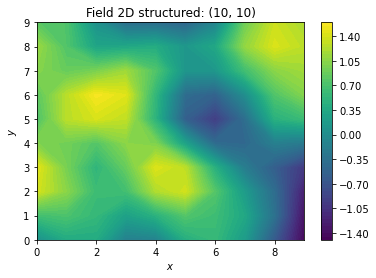

In [3]:
# structured field with a size 100x100 and a grid-size of 1x1
x = y = range(N_x)
model = gs.Gaussian( dim=2, var=1, len_scale=2.06)
srf = gs.SRF(model,mean=0,)
srf((x, y), mesh_type='structured')
srf.plot()

In [5]:
srf((x,y))

array([ 0.04617988,  0.71813473,  0.61509693,  0.86721436,  0.98797827,
       -0.57005134, -0.5390281 ,  0.64637135,  1.42298426,  1.19192462])

In [6]:
fields = []
for i in range(256):
    fields.append(srf((x, y), seed=i, mesh_type='structured'))

In [10]:
np.array(fields).shape

(256, 10, 10)

In [11]:
fields_save = np.reshape(np.array(fields),(100,-1))

In [12]:
fields_check = np.reshape(fields_save,(N_k,N_x,N_x))

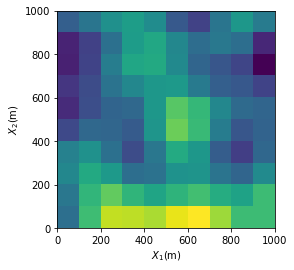

In [20]:
fig = plt.figure(figsize=(5,4))

plt.imshow(fields_check[0,:,:],extent=[0,1000,0,1000])
plt.xlabel(r'$X_1$(m)')
plt.ylabel(r'$X_2$(m)')
plt.show()

In [18]:
    extent = [0,1000,0,1000]
    fig = plt.figure(figsize=(5,4))
    im = plt.imshow(fields_check[0,:,:],extent=[0,1000,0,1000], interpolation='nearest', norm=colors.LogNorm(vmin=fields_check.min(), vmax=fields_check.max()))
    cbar = fig.colorbar(im)
    cbar.set_label(r'permeability ($m/s$)')
    plt.xlabel(r'$X_1$(m)')
    plt.ylabel(r'$X_2$(m)')
    plt.show()
    fig.savefig(f'Permability_{ir}.png')

ValueError: minvalue must be positive

ValueError: minvalue must be positive

<Figure size 360x288 with 2 Axes>

In [41]:
np.reshape(fields_save,(N_k,N_x,N_x))

array([[[-1.18380423, -0.86776158, -0.46540459, ..., -0.86707326,
         -0.36924643, -0.78080281],
        [-1.90353894, -1.5660028 , -0.94266977, ..., -0.83243802,
         -0.9688936 , -1.86276613],
        [-1.92225039, -1.54049866, -0.74787135, ..., -1.29762492,
         -1.51054404, -2.25073586],
        ...,
        [-0.61478365, -0.09427903, -0.34111959, ..., -0.88658646,
         -1.09978399, -0.55965648],
        [-0.84547713,  0.08005942,  0.44225664, ..., -0.0627173 ,
         -0.21315876,  0.17536539],
        [-0.96070834,  0.19886083,  0.96654993, ...,  0.77328747,
          0.18274289,  0.17345454]],

       [[-0.16706752, -0.93510329, -0.80108121, ...,  0.68523867,
          0.85637409,  0.71263968],
        [ 0.08983613, -0.99898525, -1.18548955, ...,  0.93045947,
          1.84191584,  1.57314781],
        [ 0.45305912, -0.19376325, -0.61579537, ...,  0.40733062,
          1.82177993,  2.0147648 ],
        ...,
        [ 0.67192645, -0.18818333, -0.94583525, ...,  

In [42]:
np.savetxt("k_array.txt",fields_save)